In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import statsmodels.api as sm
import numpy as np
from statsmodels.api import OLS
from statsmodels.tools import add_constant

mpl.rc('font', family='Malgun Gothic')

In [2]:
!pip install linearmodels

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from linearmodels.panel import PanelOLS

In [4]:
df_population = pd.read_excel('(8개통합)행정구역_읍면동_별_5세별_주민등록인구_2011년__20240521180745_분석(전월_대비_증감,증감률).xlsx')
df_loan = pd.read_excel('예금은행 대출금리 관련 지표.xlsx')
df_grdp = pd.read_excel('GRDP_시_군_구__20240614151821.xlsx')

In [5]:
df_allpopulation = df_population[df_population['5세별'] == '계'][['행정구역(동읍면)별', '시점', '총인구수 (명)', '아파트 매매 원데이터', '미분양 주택 현황 원데이터']]

In [6]:
df2_grdp = df_grdp[['행정구역(동읍면)별', '시점', 'GRDP(만원)','1인당 GRDP(만원)']]
df2_grdp 

,행정구역(동읍면)별,시점,GRDP(만원),1인당 GRDP(만원)
0,서울특별시,2019-01-01,435927212,45118
1,서울특별시,2019-02-01,435927212,45118
2,서울특별시,2019-03-01,435927212,45118
3,서울특별시,2019-04-01,435927212,45118
4,서울특별시,2019-05-01,435927212,45118
...,...,...,...,...
475,양산시,2023-08-01,11893017,33489
476,양산시,2023-09-01,11893017,33489
477,양산시,2023-10-01,11893017,33489
478,양산시,2023-11-01,11893017,33489


In [7]:
m1 = pd.merge(df_allpopulation, df2_grdp, on=['시점', '행정구역(동읍면)별'], how='left')

In [8]:
df_new_loan = df_loan[['시점', '가계대출 (연리%)', '주택담보대출 (연리%)']]
final_merge = pd.merge(m1, df_new_loan, on='시점', how='left')

In [9]:
final_merge['log_총인구수'] = np.log(final_merge['총인구수 (명)'])
final_merge['log_GRDP'] = np.log(final_merge['GRDP(만원)'])
final_merge['log_1인당 GRDP'] = np.log(final_merge['1인당 GRDP(만원)'])
final_merge

,행정구역(동읍면)별,시점,총인구수 (명),아파트 매매 원데이터,미분양 주택 현황 원데이터,GRDP(만원),1인당 GRDP(만원),가계대출 (연리%),주택담보대출 (연리%),log_총인구수,log_GRDP,log_1인당 GRDP
0,창원시,2019-01-01,1053290,91.9,6736,39860038,38153,3.58,3.12,13.867429,17.500885,10.549360
1,창원시,2019-02-01,1052458,91.5,6773,39860038,38153,3.50,3.08,13.866639,17.500885,10.549360
2,창원시,2019-03-01,1051118,91.1,6750,39860038,38153,3.53,3.04,13.865365,17.500885,10.549360
3,창원시,2019-04-01,1049897,90.6,5892,39860038,38153,3.48,2.98,13.864203,17.500885,10.549360
4,창원시,2019-05-01,1049052,90.0,5892,39860038,38153,3.49,2.93,13.863397,17.500885,10.549360
...,...,...,...,...,...,...,...,...,...,...,...,...
475,양산시,2023-08-01,354877,93.6,482,11893017,33489,4.83,4.31,12.779527,16.291462,10.418972
476,양산시,2023-09-01,355032,93.6,476,11893017,33489,4.90,4.35,12.779963,16.291462,10.418972
477,양산시,2023-10-01,355136,93.6,471,11893017,33489,5.04,4.56,12.780256,16.291462,10.418972
478,양산시,2023-11-01,355270,93.5,465,11893017,33489,5.04,4.48,12.780633,16.291462,10.418972


In [10]:
# 최종 병합 데이터 패널자료화 
final_merge = final_merge.set_index(['행정구역(동읍면)별', '시점'])
final_merge

총인구수 (명)  아파트 매매 원데이터  미분양 주택 현황 원데이터  GRDP(만원)  \
행정구역(동읍면)별 시점                                                            
창원시        2019-01-01   1053290         91.9            6736  39860038   
           2019-02-01   1052458         91.5            6773  39860038   
           2019-03-01   1051118         91.1            6750  39860038   
           2019-04-01   1049897         90.6            5892  39860038   
           2019-05-01   1049052         90.0            5892  39860038   
...                         ...          ...             ...       ...   
양산시        2023-08-01    354877         93.6             482  11893017   
           2023-09-01    355032         93.6             476  11893017   
           2023-10-01    355136         93.6             471  11893017   
           2023-11-01    355270         93.5             465  11893017   
           2023-12-01    355122         93.3             462  11893017   

                       1인당 GRDP(만원)  가계대출 (연리%)  주택담보대출 (연리%)   log_총인구수  \
행정구역(동읍면)별 시점                                                              
창원시        2019-01-01         38153        3.58          3.12  13.867429   
           2019-02-01         38153        3.50          3.08  13.866639   
           2019-03-01         38153        3.53          3.04  13.865365   
           2019-04-01         38153        3.48          2.98  13.864203   
           2019-05-01         38153        3.49          2.93  13.863397   
...                             ...         ...           ...        ...   
양산시        2023-08-01         33489        4.83          4.31  12.779527   
           2023-09-01         33489        4.90          4.35  12.779963   
           2023-10-01         33489        5.04          4.56  12.780256   
           2023-11-01         33489        5.04          4.48  12.780633   
           2023-12-01         33489        4.82          4.16  12.780217   

                        log_GRDP  log_1인당 GRDP  
행정구역(동읍면)별 시점                                   
창원시        2019-01-01  17.500885     10.549360  
           2019-02-01  17.500885     10.549360  
           2019-03-01  17.500885     10.549360  
           2019-04-01  17.500885     10.549360  
           2019-05-01  17.500885     10.549360  
...                          ...           ...  
양산시        2023-08-01  16.291462     10.418972  
           2023-09-01  16.291462     10.418972  
           2023-10-01  16.291462     10.418972  
           2023-11-01  16.291462     10.418972  
           2023-12-01  16.291462     10.418972  

[480 rows x 10 columns]

In [15]:
Y = final_merge['아파트 매매 원데이터']
X = final_merge[['log_총인구수', 'log_1인당 GRDP', '가계대출 (연리%)', '주택담보대출 (연리%)', '미분양 주택 현황 원데이터']]

In [16]:
X = sm.add_constant(X)

In [17]:
model = PanelOLS(Y, X, entity_effects=True)
results = model.fit()

In [18]:
print(results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:            아파트 매매 원데이터   R-squared:                        0.6227
Estimator:                   PanelOLS   R-squared (Between):          -1.277e+04
No. Observations:                 480   R-squared (Within):               0.6227
Date:                Tue, Jun 18 2024   R-squared (Overall):             -1065.8
Time:                        23:05:18   Log-likelihood                   -1297.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      154.14
Entities:                           8   P-value                           0.0000
Avg Obs:                       60.000   Distribution:                   F(5,467)
Min Obs:                       60.000                                           
Max Obs:                       60.000   F-statistic (robust):             154.14
                            

In [19]:
# 다중공선성 검토
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
X_vif = final_merge[['log_총인구수', 'log_1인당 GRDP', '가계대출 (연리%)', '주택담보대출 (연리%)', '미분양 주택 현황 원데이터']]

In [21]:
# 다중공선성 계산(VIF 계산)
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

In [22]:
vif_data

,feature,VIF
0,log_총인구수,159.263337
1,log_1인당 GRDP,182.209572
2,가계대출 (연리%),470.053116
3,주택담보대출 (연리%),501.255291
4,미분양 주택 현황 원데이터,1.991315


In [23]:
correlation_matrix = pd.concat([X, Y], axis=1).corr()

In [24]:
# 다중공선성의 문제가 있을 수 있다(총인구수와 GRDP)
correlation_matrix

,const,log_총인구수,log_1인당 GRDP,가계대출 (연리%),주택담보대출 (연리%),미분양 주택 현황 원데이터,아파트 매매 원데이터
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN
log_총인구수,NaN,1.000000,0.358493,-0.007480,-0.007799,0.128567,-0.150974
log_1인당 GRDP,NaN,0.358493,1.000000,0.169198,0.174272,0.076419,-0.061425
가계대출 (연리%),NaN,-0.007480,0.169198,1.000000,0.979456,-0.015042,0.285870
주택담보대출 (연리%),NaN,-0.007799,0.174272,0.979456,1.000000,-0.090292,0.406697
미분양 주택 현황 원데이터,NaN,0.128567,0.076419,-0.015042,-0.090292,1.000000,-0.479862
아파트 매매 원데이터,NaN,-0.150974,-0.061425,0.285870,0.406697,-0.479862,1.000000


In [25]:
final_merge['잔차'] = results.resids

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


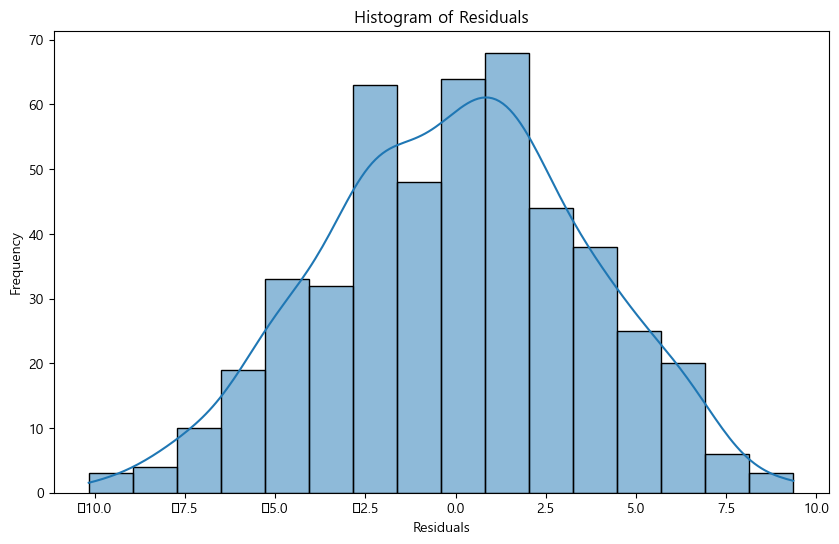

In [26]:
# 잔차의 히스토그램 (정규성 검토)
plt.figure(figsize=(10, 6))
sns.histplot(final_merge['잔차'], kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [27]:
# 잔차를 통해 독립성과 등분산성 검토
data = pd.concat([X, Y], axis=1)
data

const   log_총인구수  log_1인당 GRDP  가계대출 (연리%)  \
행정구역(동읍면)별 시점                                                       
창원시        2019-01-01    1.0  13.867429     10.549360        3.58   
           2019-02-01    1.0  13.866639     10.549360        3.50   
           2019-03-01    1.0  13.865365     10.549360        3.53   
           2019-04-01    1.0  13.864203     10.549360        3.48   
           2019-05-01    1.0  13.863397     10.549360        3.49   
...                      ...        ...           ...         ...   
양산시        2023-08-01    1.0  12.779527     10.418972        4.83   
           2023-09-01    1.0  12.779963     10.418972        4.90   
           2023-10-01    1.0  12.780256     10.418972        5.04   
           2023-11-01    1.0  12.780633     10.418972        5.04   
           2023-12-01    1.0  12.780217     10.418972        4.82   

                       주택담보대출 (연리%)  미분양 주택 현황 원데이터  아파트 매매 원데이터  
행정구역(동읍면)별 시점                                                     
창원시        2019-01-01          3.12            6736         91.9  
           2019-02-01          3.08            6773         91.5  
           2019-03-01          3.04            6750         91.1  
           2019-04-01          2.98            5892         90.6  
           2019-05-01          2.93            5892         90.0  
...                             ...             ...          ...  
양산시        2023-08-01          4.31             482         93.6  
           2023-09-01          4.35             476         93.6  
           2023-10-01          4.56             471         93.6  
           2023-11-01          4.48             465         93.5  
           2023-12-01          4.16             462         93.3  

[480 rows x 7 columns]

In [28]:
data = data.dropna()

In [29]:
# 결측치를 제거한 후 다시 X와 y로 분리
X = data.drop(columns='아파트 매매 원데이터')
y = data['아파트 매매 원데이터']

In [30]:
X = add_constant(X)
model = OLS(y, X).fit()

In [31]:
# 예측값과 잔차 계산
predictions = model.fittedvalues
residuals = y - predictions

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


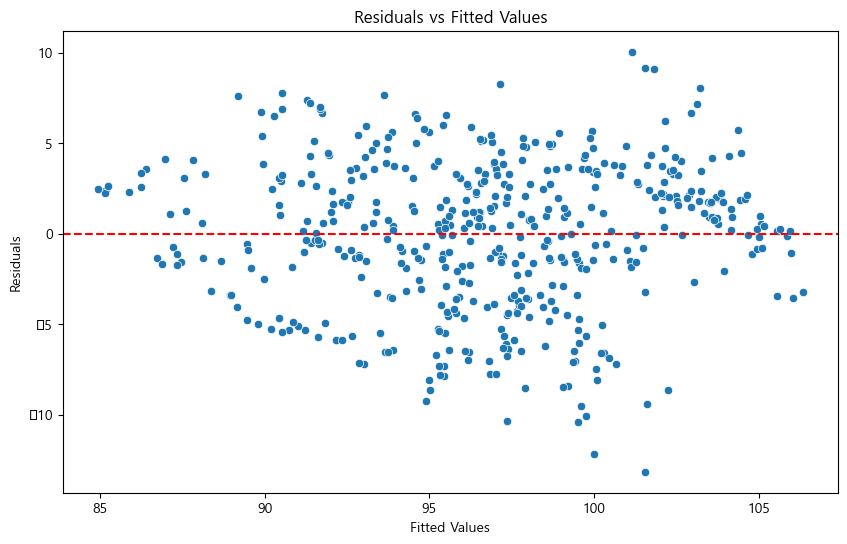

In [32]:
# 잔차 vs. 예측값 산점도 (독립성, 등분산성 검토)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()